In [15]:
# ---------------- Import Libraries ----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [16]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [22]:
# ---------------- Select Features ----------------
# Focusing on Age, Annual Income, and Spending Score
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:

# ---------------- Data Standardization ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

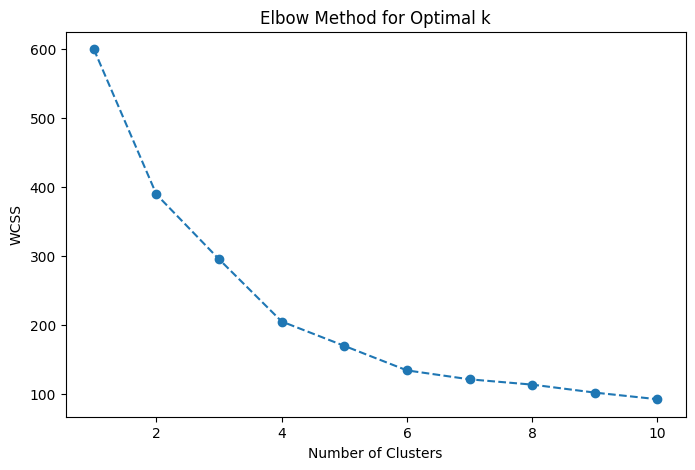

In [25]:

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# ---------------- K-Means Clustering ----------------
# Let's say from Elbow, optimal clusters = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [27]:
# Add Cluster Labels to DataFrame
df['Cluster'] = cluster_labels

# Check cluster distribution
print(df['Cluster'].value_counts())


Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


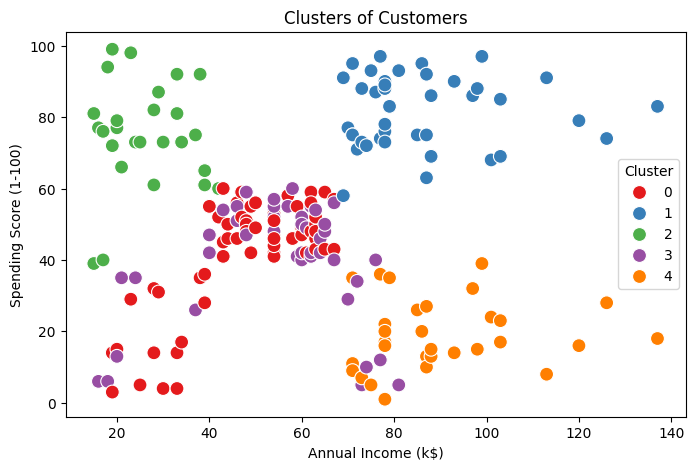

In [28]:
# ---------------- Visualize Clusters ----------------
# Scatter Plot for Spending Score vs Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Clusters of Customers')
plt.show()

In [29]:
# ---------------- Silhouette Score ----------------
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.41
